MATRICULAS ED. SUPERIOR REGION OHIGGINS 2021

Poblacion: Las matriculas en la educacion superior de la region de ohiggins en el año 2021.

Muestra: 22.114 matriculas en la educacion superior en la region de ohiggins correspondientes al año 2021.

VARIABLES UTILIZADAS DE LA BASE DE DATOS:

VALOR MATRICULA: cuantitativa continua

VALOR ARANCEL: cuantitativa continua

===========================================================================================

Correlación entre el valor de la matrícula y el valor del arancel para toda la base de datos.


Luego separen por tipo de institución. 

¿Los grupos se comportan parecido? ¿Vale la pena estudiar todos los grupos? Visualicen apropiadamente.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_excel('08_MATRICULAS_ED_SUPERIOR_B_OHIGGINS_2021.xlsx')
df.columns



Index(['ID', 'GENERO', 'EDAD', 'RANGO EDAD', 'AÑO INGRESO', 'SEMESTRE INGRESO',
       'TIPO DE INSTITUCION', 'NOMBRE DE INSTITUCION',
       'ACREDITACION INSTITUCIONAL', 'PERIODO DE ACREDITACION',
       'AÑOS DE ACREDITACION', 'NOMBRE CARRERA', 'REQUISITO INGRESO',
       'VIA DE INGRESO', 'MODALIDAD', 'JORNADA', 'TIPO PLAN CARRERA',
       'NIVEL DE ESTUDIO CARRERA', 'NIVEL CARRERA', 'AREA CONOCIMIENTO',
       'DURACION PLAN DE ESTUDIO (SEMESTRES)',
       'DURACION PROCESO TITULACION (SEMESTRES)',
       'DURACION TOTAL CARRERA (SEMESTRES)', 'VALOR MATRICULA (PESOS)',
       'VALOR ARANCEL (PESOS)', 'REGION SEDE', 'PROVINCIA SEDE',
       'COMUNA SEDE'],
      dtype='object')

In [9]:
# --- Ítem 1.1: Correlación Matrícula vs. Arancel (General) ---
print("--- Análisis 1: Correlación Matrícula vs. Arancel (General) ---")

# Calcular la matriz de correlación
corr_general = df['VALOR MATRICULA (PESOS)'].corr(df['VALOR ARANCEL (PESOS)'])

print(f'\nCorrelación entre Matrícula y Arancel: {corr_general:.4f}')

--- Análisis 1: Correlación Matrícula vs. Arancel (General) ---

Correlación entre Matrícula y Arancel: 0.6011


In [10]:
# --- Ítem 1.2: Correlación por Tipo de Institución ---
corr_por_tipo = df.groupby("TIPO DE INSTITUCION")[["VALOR MATRICULA (PESOS)", "VALOR ARANCEL (PESOS)"]].corr().iloc[0::2, -1]
print("\nAnalisis 2: Correlación por tipo de institución:")
corr_por_tipo


Analisis 2: Correlación por tipo de institución:


TIPO DE INSTITUCION                                  
Centros de Formacion Tecnica  VALOR MATRICULA (PESOS)    0.703693
Institutos Profesionales      VALOR MATRICULA (PESOS)    0.614714
Universidades CRUCH           VALOR MATRICULA (PESOS)    0.570541
Universidades Privadas        VALOR MATRICULA (PESOS)   -0.380480
Name: VALOR ARANCEL (PESOS), dtype: float64

Los Centros de Formación Técnica, Institutos Profesionales y Universidades CRUCH muestran correlaciones positivas moderadas (0.57–0.70), lo que indica que a mayor matrícula tiende a haber mayor arancel.

En cambio, las Universidades Privadas presentan correlación negativa (-0.38), indicando comportamiento opuesto.

Modelo Corregido: y = 6.2685x + 1035203.92
R² Corregido = 0.361


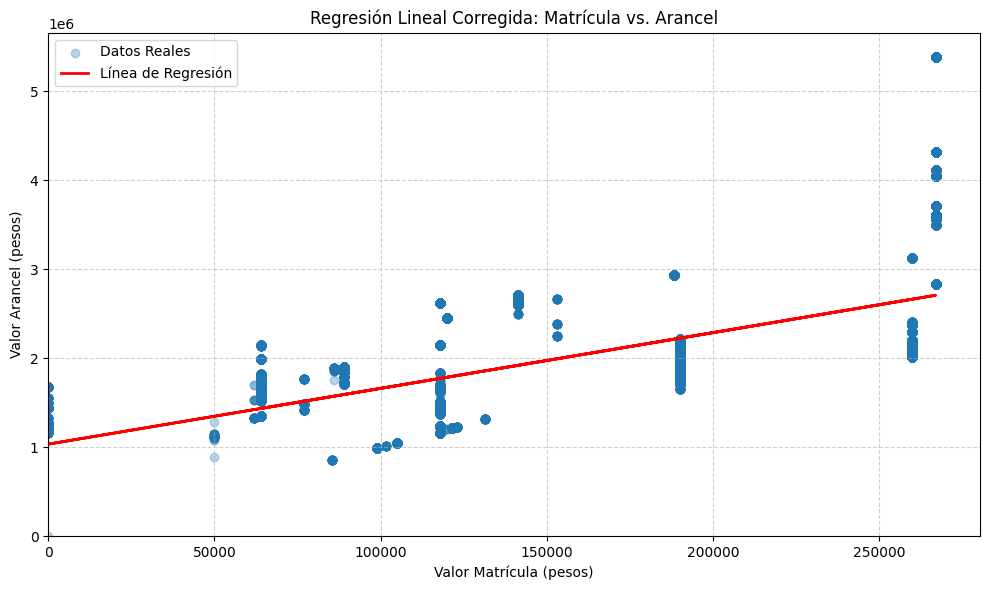

In [17]:
model = LinearRegression() 
model.fit(X, y)

# Obtener los coeficientes correctos
pendiente = model.coef_[0]
intercepto = model.intercept_
r2 = model.score(X, y)

print(f"Modelo Corregido: y = {pendiente:.4f}x + {intercepto:.2f}")
print(f"R² Corregido = {r2:.3f}")

# Visualización
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.3, label='Datos Reales')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Línea de Regresión')
plt.title("Regresión Lineal Corregida: Matrícula vs. Arancel")
plt.xlabel("Valor Matrícula (pesos)")
plt.ylabel("Valor Arancel (pesos)")
plt.xlim(0)
plt.ylim(0)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

¿Cuál es la relación entre el arancel y la duración de la carrera correspondiente? ¿Es verdad que, mientras más larga la carrera, más cara? ¿Será igual en todas las áreas del conocimiento?

In [19]:
# --- Análisis 1: Correlación General ---
corr_general = df["VALOR ARANCEL (PESOS)"].corr(df["DURACION TOTAL CARRERA (SEMESTRES)"])
print("--- Análisis 1: Correlación General ---")
print(f"Correlación entre arancel y duración: {corr_general:.4f}")

--- Análisis 1: Correlación General ---
Correlación entre arancel y duración: 0.6357


In [20]:
# --- Análisis 2: Correlación por Área de Conocimiento ---
corr_por_area = df.groupby("AREA CONOCIMIENTO")[["VALOR ARANCEL (PESOS)", "DURACION TOTAL CARRERA (SEMESTRES)"]].corr().iloc[0::2, -1]
print("\n--- Análisis 2: Correlación por Área de Conocimiento ---")
print(corr_por_area)


--- Análisis 2: Correlación por Área de Conocimiento ---
AREA CONOCIMIENTO                               
Administracion y Comercio  VALOR ARANCEL (PESOS)    0.351330
Agropecuaria               VALOR ARANCEL (PESOS)    0.818027
Arte y Arquitectura        VALOR ARANCEL (PESOS)    0.635824
Ciencias Basicas           VALOR ARANCEL (PESOS)         NaN
Ciencias Sociales          VALOR ARANCEL (PESOS)    0.679500
Derecho                    VALOR ARANCEL (PESOS)    0.686362
Educacion                  VALOR ARANCEL (PESOS)    0.809315
Salud                      VALOR ARANCEL (PESOS)    0.812225
Tecnologia                 VALOR ARANCEL (PESOS)    0.400613
Name: DURACION TOTAL CARRERA (SEMESTRES), dtype: float64


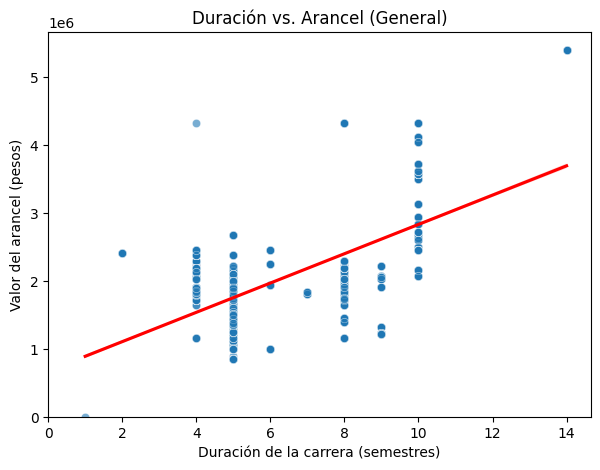

In [22]:
# --- Análisis 3: Visualización Global ---
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="DURACION TOTAL CARRERA (SEMESTRES)", y="VALOR ARANCEL (PESOS)", alpha=0.6)
sns.regplot(data=df, x="DURACION TOTAL CARRERA (SEMESTRES)", y="VALOR ARANCEL (PESOS)", scatter=False, color="red")
plt.title("Duración vs. Arancel (General)")
plt.xlabel("Duración de la carrera (semestres)")
plt.ylabel("Valor del arancel (pesos)")
plt.xlim(0)
plt.ylim(0)
plt.show()

In [29]:
# --- Ítem 1.3: Correlación entre Arancel y Duración por Área ---
corr_por_area = (
    df.groupby("AREA CONOCIMIENTO")[["VALOR ARANCEL (PESOS)", "DURACION TOTAL CARRERA (SEMESTRES)"]]
    .corr()
    .iloc[0::2, -1]
    .reset_index()
)

corr_por_area.columns = ["Área de Conocimiento", "Variable", "Correlación"]
corr_por_area = corr_por_area[["Área de Conocimiento", "Correlación"]]
corr_por_area = corr_por_area.sort_values("Correlación", ascending=False)
print("--- Ítem 1.3: Correlación entre Arancel y Duración por Área ---")
print(corr_por_area)


--- Ítem 1.3: Correlación entre Arancel y Duración por Área ---
        Área de Conocimiento  Correlación
1               Agropecuaria     0.818027
7                      Salud     0.812225
6                  Educacion     0.809315
5                    Derecho     0.686362
4          Ciencias Sociales     0.679500
2        Arte y Arquitectura     0.635824
8                 Tecnologia     0.400613
0  Administracion y Comercio     0.351330
3           Ciencias Basicas          NaN


¿Se produjo una gran vuelta a la presencialidad o los formatos que incluyen la no presencialidad han ganado terreno?

In [ ]:
# ---    # Pregunta 1: ¿Presencialidad vs. Formatos No Presenciales?
   
print("--- 1. Análisis de Modalidad (Presencial vs. No Presencial) ---")
    
   
modalidad_conteo = df['MODALIDAD'].value_counts()
   
modalidad_porcentaje = df['MODALIDAD'].value_counts(normalize=True) * 100
    
print("Conteo de matrículas por modalidad:")
print(modalidad_conteo)
print("\nPorcentaje de matrículas por modalidad:")
print(modalidad_porcentaje)
    
    
presencial_perc = modalidad_porcentaje.get('Presencial', 0)
print(f"\nConclusión: El {presencial_perc:.2f}% de las matrículas son presenciales.")
print("----------------------------------------------------------\n")

--- 1. Análisis de Modalidad (Presencial vs. No Presencial) ---
Conteo de matrículas por modalidad:
MODALIDAD
Presencial       21930
No Presencial      184
Name: count, dtype: int64

Porcentaje de matrículas por modalidad:
MODALIDAD
Presencial       99.167948
No Presencial     0.832052
Name: proportion, dtype: float64

Conclusión: El 99.17% de las matrículas son presenciales.
----------------------------------------------------------



In [ ]:

# Pregunta 2: ¿Qué tipo de institución usa más formatos no presenciales?

print("\n--- 2. % No Presencial por Institución ---")


df['ES_NO_PRESENCIAL'] = (df['MODALIDAD'] == 'No Presencial').astype(int)


porcentaje_no_presencial = df.groupby('TIPO DE INSTITUCION')['ES_NO_PRESENCIAL'].mean() * 100


print(porcentaje_no_presencial.sort_values(ascending=False))


--- 2. % No Presencial por Institución ---
TIPO DE INSTITUCION
Institutos Profesionales        1.438062
Centros de Formacion Tecnica    0.000000
Universidades CRUCH             0.000000
Universidades Privadas          0.000000
Name: ES_NO_PRESENCIAL, dtype: float64


In [ ]:

# Pregunta 3: Probabilidad (Educación | Género)

print("\n--- 3. Probabilidad Condicional (Educación | Género) ---")

# P(Educación | Hombre) 
# P(A|B) = P(A y B) / P(B)

total_hombres = (df['GENERO'] == 'Masculino').sum()

hombres_y_educacion = (
    (df['GENERO'] == 'Masculino') & 
    (df['AREA CONOCIMIENTO'] == 'Educacion')
).sum()

# Probabilidad
prob_hombre = hombres_y_educacion / total_hombres

print(f"P(Educación | Hombre) = {hombres_y_educacion} / {total_hombres} = {prob_hombre:.2%}")



total_mujeres = (df['GENERO'] == 'Femenino').sum()


mujeres_y_educacion = (
    (df['GENERO'] == 'Femenino') & 
    (df['AREA CONOCIMIENTO'] == 'Educacion')
).sum()

prob_mujer = mujeres_y_educacion / total_mujeres

print(f"P(Educación | Mujer) = {mujeres_y_educacion} / {total_mujeres} = {prob_mujer:.2%}")



ratio = prob_mujer / prob_hombre
print(f"\nRatio: Es {ratio:.2f} veces más probable que una mujer estudie Educación que un hombre.")

print("\n--- Fin del Análisis ---")


--- 3. Probabilidad Condicional (Educación | Género) ---
P(Educación | Hombre) = 586 / 9805 = 5.98%
P(Educación | Mujer) = 2813 / 12309 = 22.85%

Ratio: Es 3.82 veces más probable que una mujer estudie Educación que un hombre.

--- Fin del Análisis ---
